Malaya provided basic interface for Pretrained Transformer encoder models, specific to Malay, local social media slang and Manglish language, we called it Transformer-Bahasa. This interface not able us to use it to do custom training.

If you want to download pretrained model for Transformer-Bahasa and use it for custom transfer-learning, you can download it here, https://github.com/huseinzol05/Malaya/tree/master/pretrained-model/, some notebooks to help you get started.

In [1]:
%%time
import malaya

CPU times: user 6.64 s, sys: 1.53 s, total: 8.17 s
Wall time: 11.9 s


## list Transformer-Bahasa available

In [2]:
malaya.transformer.available_model()

{'bert': ['base', 'small'], 'xlnet': ['base'], 'albert': ['base']}

1. `bert` is original BERT google architecture with `base` and `small` sizes.

2. `xlnet` is original XLNET google architecture with `base` size.

3. `albert` is A-Lite BERT google + toyota architecture with `base` size.

## Load XLNET-Bahasa

Feel free to use another models.

In [3]:
xlnet = malaya.transformer.load(model = 'xlnet')

W1018 10:01:11.627138 4645320128 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet_model/xlnet.py:70: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

W1018 10:01:11.631047 4645320128 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet.py:71: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1018 10:01:11.645381 4645320128 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet_model/xlnet.py:253: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.

W1018 10:01:11.646437 4645320128 deprecation_wrapper.py:119] From /Users/huseinzol/Documents/Malaya/malaya/_transformer/_xlnet_model/xlnet.py:253: The name tf.AUTO_REUSE is deprecated. Please use tf.compat.v1.AUTO_REUSE instead.

W1018 10:01:11.648410 4645320128 deprecation_wrapper.py:119] From /Users/huseinzol/Documen

In [5]:
strings = ['Kerajaan galakkan rakyat naik public transport tapi parking kat lrt ada 15. Reserved utk staff rapid je dah berpuluh. Park kereta tepi jalan kang kene saman dgn majlis perbandaran. Kereta pulak senang kene curi. Cctv pun tak ada. Naik grab dah 5-10 ringgit tiap hari. Gampang juga',
           'Alaa Tun lek ahhh npe muka masam cmni kn agong kata usaha kerajaan terdahulu sejak selepas merdeka',
           "Orang ramai cakap nurse kerajaan garang. So i tell u this. Most of our local ppl will treat us as hamba abdi and they don't respect us as a nurse"]

I have random sentences copied from Twitter, searched using `kerajaan` keyword.

#### Vectorization

Change a string or batch of strings to latent space / vectors representation.

In [7]:
v = xlnet.vectorize(strings)
v.shape

(3, 512)

#### Attention

Attention is to get which part of the sentence give the impact. Method available for attention,

- `'last'` - attention from last layer.
- `'first'` - attention from first layer.
- `'mean'` - average attentions from all layers.

You can give list of strings or a string to get the attention, in this documentation, I just want to use a string.

In [8]:
xlnet.attention(strings[1], method = 'last')

[[('Alaa', 0.037521128),
  ('Tun', 0.064996645),
  ('lek', 0.029629104),
  ('ahhh', 0.06980243),
  ('npe', 0.0651414),
  ('muka', 0.043275837),
  ('masam', 0.05444884),
  ('cmni', 0.06830223),
  ('kn', 0.09239126),
  ('agong', 0.05974282),
  ('kata', 0.050666627),
  ('usaha', 0.07447508),
  ('kerajaan', 0.046375286),
  ('terdahulu', 0.08609032),
  ('sejak', 0.05165012),
  ('selepas', 0.03853117),
  ('merdeka', 0.066959694)]]

In [9]:
xlnet.attention(strings[1], method = 'first')

[[('Alaa', 0.09218865),
  ('Tun', 0.082360476),
  ('lek', 0.06480303),
  ('ahhh', 0.043700345),
  ('npe', 0.04972692),
  ('muka', 0.063137144),
  ('masam', 0.04529886),
  ('cmni', 0.08594233),
  ('kn', 0.05617679),
  ('agong', 0.08094259),
  ('kata', 0.0571896),
  ('usaha', 0.05006538),
  ('kerajaan', 0.050642338),
  ('terdahulu', 0.053613685),
  ('sejak', 0.04977575),
  ('selepas', 0.041657023),
  ('merdeka', 0.03277911)]]

In [10]:
xlnet.attention(strings[1], method = 'mean')

[[('Alaa', 0.061377168),
  ('Tun', 0.058099397),
  ('lek', 0.059254784),
  ('ahhh', 0.085350394),
  ('npe', 0.052339662),
  ('muka', 0.062530704),
  ('masam', 0.04982319),
  ('cmni', 0.064762965),
  ('kn', 0.05489512),
  ('agong', 0.06542812),
  ('kata', 0.05790908),
  ('usaha', 0.053684656),
  ('kerajaan', 0.052263502),
  ('terdahulu', 0.056048058),
  ('sejak', 0.056344092),
  ('selepas', 0.049894),
  ('merdeka', 0.05999512)]]

#### Visualize Attention

Before using attention visualization, we need to load D3 into our jupyter notebook first. This visualization borrow from https://github.com/jessevig/bertviz .

In [11]:
%%javascript
require.config({
  paths: {
      d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min',
      jquery: '//ajax.googleapis.com/ajax/libs/jquery/2.0.0/jquery.min',
  }
});

<IPython.core.display.Javascript object>

In [12]:
xlnet.visualize_attention('nak makan ayam dgn husein')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

_I attached a printscreen, readthedocs cannot visualize the javascript._

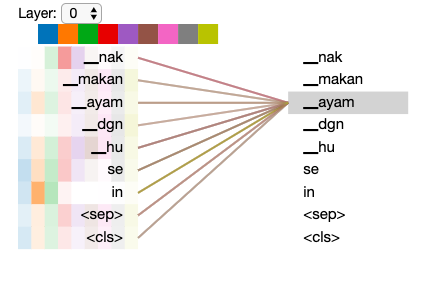

In [13]:
from IPython.core.display import Image, display

display(Image('xlnet-attention.png', width=300))

**All attention models able to use these interfaces.**